# LOAD DATA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('datasets/score_updated.csv')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   96 non-null     float64
 1   Scores  96 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 1.6 KB


In [ ]:
df = df.loc[:, ['Hours', 'Scores']]
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
...,...,...
91,5.8,60
92,4.4,44
93,6.1,63
94,3.7,37


# DATA PROCESSING

In [ ]:
x = df['Hours'].values
y = df['Scores'].values

In [ ]:
n = len(x)

# MODELING

In [ ]:
sum_x = np.sum(x)
sum_y = np.sum(y)
sum_xy = np.sum(x*y)
sum_x2 = np.sum(x*x)

In [ ]:
a = (sum_y * sum_x2 - sum_x * sum_xy) / (n * sum_x2 - sum_x**2)
b = (n * sum_xy - sum_x * sum_y) / (n * sum_x2 - sum_x**2)

In [ ]:
new_hours = 2.5
score_pred = a + b * new_hours
print("Waktu belajar:", new_hours, "| Score yang didapatkan:", score_pred)

Waktu belajar: 2.5 | Score yang didapatkan: 26.61687227623255


# EVALUATION

In [ ]:
y_pred = a + b * x

In [ ]:
SS_res = np.sum((y - y_pred)**2)
SS_tot = np.sum((y - np.mean(y))**2)
r2 = 1 - SS_res / SS_tot

In [ ]:
mae = np.mean(np.abs(y - y_pred))
mse = np.mean((y - y_pred)**2)
rmse = np.sqrt(mse)

In [ ]:
print("Model Performance:")
print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE: ", rmse)
print("R-squared: ", r2)

Model Performance:
MAE:  2.604096077617386
MSE:  11.54021082950942
RMSE:  3.3970885813457117
R-squared:  0.9813673346564977


# VISUALIZATION

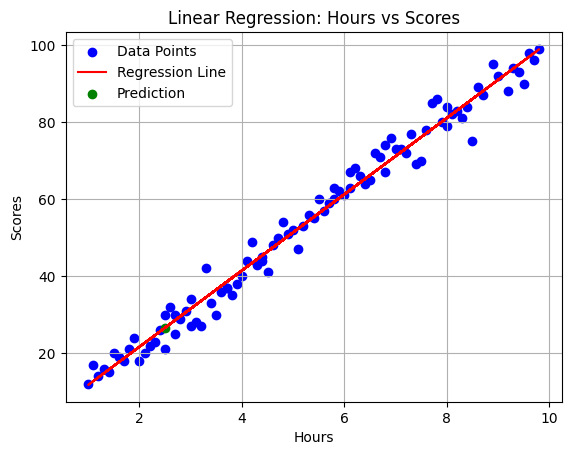

In [ ]:
plt.title("Linear Regression: Study Hours vs Scores")
plt.scatter(x, y, color='blue', label='Data Points')
plt.plot(x, y_pred, color='red', label='Regression Line')
plt.scatter(new_hours, score_pred, color='green', label='Prediction')
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.grid(True)
plt.legend()
plt.show()